# Predicting Player Subscription to a Video Game Related Newsletter

Frank Wood and his research group from UBC have collected data on the behaviours of various players in a Minecraft server. In particular, they have noted whether or not a player is subscribed to a game-related newsletter. This study aims to determine if played hours and the age of players can accurately predict whether players are subscribed to a game-related newsletter in Wood’s research Minecraft server through a K-Nearest Neighbor classification model. 

The data set that was used contains 7 variables:
- experience (character), which represents players' experience by one of the four choices: Pro, Veteran, Amateur, and Regular - subscribe (logical), which illustrates whether the player subscribed to a video game related newsletter by either True or False
- hashedEmail (character), which shows the players' email
- played_hours (double), which shows the number of hours played by the players with decimal points
- name (character), which demonstrates the player's name
- gender (character), which demonstrates the gender of the player as either Male or Female
- age (double), which shows the age of the players in whole numbers

There are a total of 196 observations.

## Library Loading
The analysis will use the following three libraries:
- tidyverse
- repr
- tidymodels

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Randomness
To make the analysis reproducible, the `set.seed` function is used.

In [2]:
set.seed(5678)

## Data Loading

In order to build the model, the dataset is first loaded using R's built-in `read_csv` function. Since the dataset file uses commas as a delimeter, no additional arguments were passed into the function.

In [3]:
# load data code
players_data <- read_csv("players.csv")
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


At this point, it can be seen that there are a total of 7 different columns and of which the `subscribe` column would work as a target variable for the model.

## Data Cleaning and Wrangling

First, the columns are named using different casing styles and are thus renamed using the `rename` function from the `dplyr` package to ensure consistency across the dataset.

In [4]:
players_data <- rename(players_data,
    is_subscribed = subscribe,
    hashed_email = hashedEmail,
    age = Age)
head(players_data)

experience,is_subscribed,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Then the variables of interest are selected from the dataset:
- is_subscribed (target variable)
- played_hours (predictor)
- age (predictor)

In [5]:
players_data <- players_data |>
    select(is_subscribed, played_hours, age)
head(players_data)

is_subscribed,played_hours,age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


Since the `subscribe` column will be used as a categorical variable, it is convereted to a factor type from a logical type using the `as_factor` function.

In [6]:
players_data <- players_data |>
    mutate(is_subscribed = as_factor(is_subscribed))
glimpse(players_data)

Rows: 196
Columns: 3
$ is_subscribed <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, …
$ played_hours  <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, …
$ age           <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 1…


To ensure that the dataset does not contain any missing values, the `drop_na` function is used to remove any observations with empty cells.

In [7]:
players_data <- players_data |> drop_na()
glimpse(players_data)

Rows: 194
Columns: 3
$ is_subscribed <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, …
$ played_hours  <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, …
$ age           <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 1…


The difference in row count shows that there were two incomplete observations in the dataset, both of which will be ignored for the analysis.

### Data Splits
Finally, the data is split with a training to testing ratio of 75:25 using the `initial_split` function and the `is_subscribed` target variable as a stratum. This will allow the classifier to be evaluated after training.

In [8]:
players_split <- initial_split(players_data, prop = 0.75, strata = is_subscribed)
players_train <- training(players_split)
players_test <- testing(players_split)

glimpse(players_train)
glimpse(players_test)

Rows: 145
Columns: 3
$ is_subscribed <fct> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ played_hours  <dbl> 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 1.4, 0.0, 0.0, 0.0, 0…
$ age           <dbl> 17, 21, 22, 17, 23, 18, 33, 25, 24, 23, 42, 22, 37, 28, …
Rows: 49
Columns: 3
$ is_subscribed <fct> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…
$ played_hours  <dbl> 3.8, 0.0, 48.4, 0.5, 0.7, 0.6, 0.0, 0.1, 0.0, 0.4, 2.2, …
$ age           <dbl> 17, 17, 17, 17, 21, 28, 17, 21, 17, 20, 24, 17, 27, 18, …


### Data Preprocessing

To get a hold of what the dataset looks like, `group_by` and `summarize` is used to figure out the number and percentage of observations for both subscribed and unsubscribed players.

In [9]:
num_obs <- nrow(players_data)
players_data |>
    group_by(is_subscribed) |>
    summarize(
        count = n(),
        percentage = n() / num_obs * 100
    )

is_subscribed,count,percentage
<fct>,<int>,<dbl>
FALSE,52,26.80412
TRUE,142,73.19588


The results show that there is class imabalnce in the dataset as subscribed players are found much more often than unsubscribed players. To get around this issue, the rarer class, unsubscribed players, will be oversampled by replicating the observations.

To prepare the data for analysis, the values should also be standardized by scaling with `step_scale` and centering with `step_center`. The preprocessing steps are combined into a recipe.

In [10]:
library(themis)

std_recipe <- recipe(is_subscribed ~ ., data = players_data) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    step_upsample(is_subscribed, over_ratio = 1, skip = FALSE) |>
    prep()

std_data <- bake(std_recipe, players_data)

num_obs <- nrow(std_data)
std_data |>
    group_by(is_subscribed) |>
    summarize(
        count = n(),
        percentage = n() / num_obs * 100
    )

is_subscribed,count,percentage
<fct>,<int>,<dbl>
FALSE,142,50
TRUE,142,50


At this point in the analysis, the data is standardized and balanced and is ready for a visualization that well facilitate a better understanding of the relationship between `played_hours`, `age`, and `is_subscribed`.

## Exploratory Data Visualization

A colorblind-friendly scatter plot is created with `ggplot` to help visualize the two predictor variables: `played_hours` and `age`.

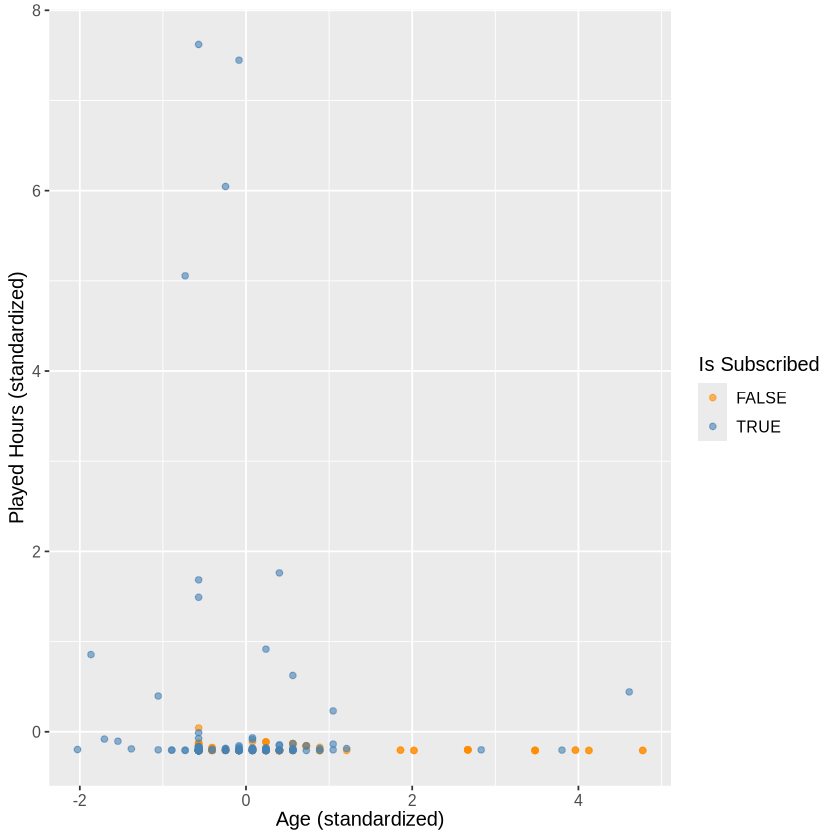

In [11]:
hours_age_plot <- ggplot(std_data, aes(x = age, y = played_hours, color = is_subscribed)) +
    geom_point(alpha = 0.6) +
    labs(x = "Age (standardized)",
         y = "Played Hours (standardized)",
         color = "Is Subscribed") +
    scale_color_manual(values = c("darkorange", "steelblue")) +
    theme(text = element_text(size = 12))
hours_age_plot

Figure 1: Scatter plot showing age of players against played hours

At first sight, the visualization shows some outliers, especially in terms of played hours. In particular, players who have played for a long time are all subscribed to a game-related newsletter. In contrast, most older players are not subscribed to a newsletter and all have a relatively low play time.

## Model Training

### Preprocessing Recipe
The data preprocessing steps explained earlier are consolidated into a recipe that can be fed into the workflow to preprocess the training set.

In [12]:
players_recipe <- recipe(is_subscribed ~ ., data = players_train) |>
    step_normalize(all_predictors()) |>
    step_upsample(is_subscribed, over_ratio = 1)

### Model Tuning
To start building the model, a tuning step is used to figure out the optimal $K$. The conditions on which $K$ is decided are accuracy and cost.

In [13]:
knn_spec_tune <- nearest_neighbor(weight_func = "rectangular",
                                  neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

To help determine the optimal $K$, a 10-fold cross-validation is used.

In [14]:
players_vfold <- vfold_cv(players_train, v = 10, strata = is_subscribed)

Then, the accuracies for each $K$ (by a step of 10) is calculated and ploted in a line graph.

In [15]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 10))

knn_tune_results <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec_tune) |>
    tune_grid(resamples = players_vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_tune_results |>
  filter(.metric == "accuracy")

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4890110,10,0.05018731,Preprocessor1_Model01
11,accuracy,binary,0.4832967,10,0.03607472,Preprocessor1_Model02
21,accuracy,binary,0.4909158,10,0.03936970,Preprocessor1_Model03
31,accuracy,binary,0.5494139,10,0.03691398,Preprocessor1_Model04
41,accuracy,binary,0.6154945,10,0.04290446,Preprocessor1_Model05
51,accuracy,binary,0.6350916,10,0.04362926,Preprocessor1_Model06
61,accuracy,binary,0.6493773,10,0.04365191,Preprocessor1_Model07
71,accuracy,binary,0.6417582,10,0.05017756,Preprocessor1_Model08
81,accuracy,binary,0.6535165,10,0.05205220,Preprocessor1_Model09


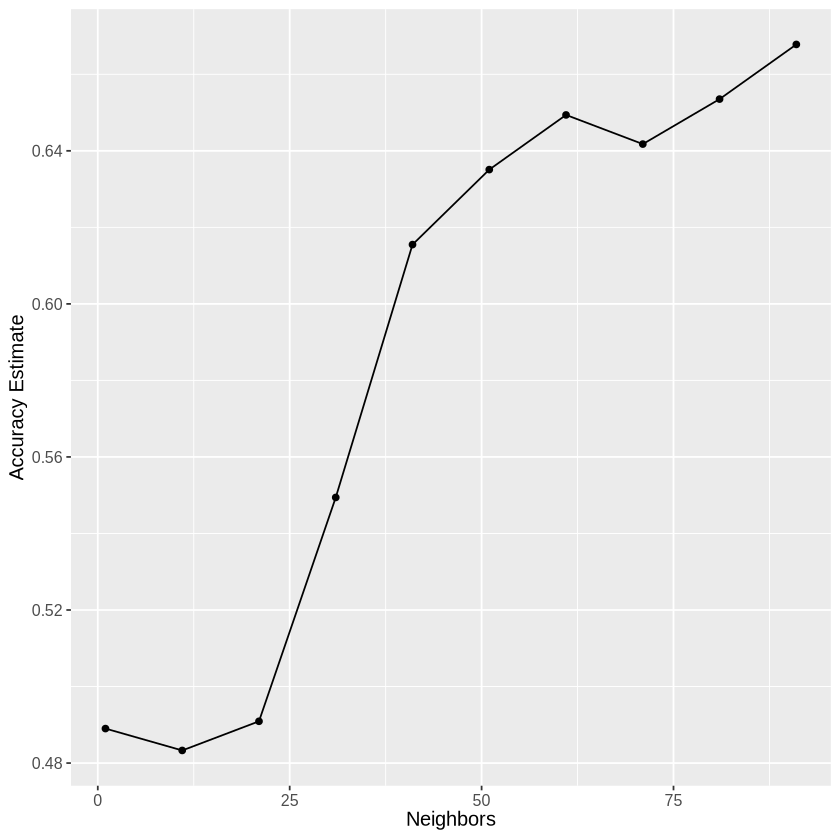

In [16]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 12))

accuracy_vs_k

Figure 2: Line graph showing accuracy against number of neighbors

The numbers of neighbors starting from $K=61$ exhibit a relatively high accuracy compared to other numbers of neighbors. Taking into account the computational cost, $K=61$ is selected for the classifier.

### Model Fitting
The model is then trained to fit the training set with $K=61$ (determined above), which is both standardized and upsampled/balanced with the preprocessing recipe.

In [17]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 61) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_upsample()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(61,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3773585
Best kernel: rectangular
Best k: 61

### Model Evaluation
After the model is trained, it is evaluated against the testing set by comparing the model predictions and the actual values.

In [18]:
players_test_predictions <- predict(knn_fit, players_test) |>
    bind_cols(players_test)

players_test_predictions

.pred_class,is_subscribed,played_hours,age
<fct>,<fct>,<dbl>,<dbl>
FALSE,TRUE,3.8,17
TRUE,TRUE,0.0,17
TRUE,TRUE,48.4,17
TRUE,TRUE,0.5,17
TRUE,TRUE,0.7,21
FALSE,TRUE,0.6,28
TRUE,TRUE,0.0,17
FALSE,TRUE,0.1,21
TRUE,TRUE,0.0,17


In the table above, `.pred_class` refers to the model predictions and the three other columns are of the testing set.

Then, the accuracy, precision, and recall is calculated. When calculating the precision and recall, the levels are inverted so that being subscribed is the "positive" class.

In [24]:
players_test_predictions |> pull(is_subscribed) |> levels()

[1] "FALSE" "TRUE"

In [25]:
players_test_predictions |>
    metrics(truth = is_subscribed, estimate = .pred_class) |>
    filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.4489796


In [21]:
players_test_predictions |>
    precision(truth = is_subscribed, estimate = .pred_class, event_level = "second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6666667


In [22]:
players_test_predictions |>
    recall(truth = is_subscribed, estimate = .pred_class, event_level = "second")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5


Lastly, a confusion matrix is generated to determine the number of true and false positives and negatives.

In [23]:
confusion <- players_test_predictions |>
    conf_mat(truth = is_subscribed, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     4   18
     TRUE      9   18

## Discussion

## Summary of Findings
With only an accuracy of 49% and a recall rate of 50%, we can conclude that playing hours and age are not strong predictors of whether or not a player is subscribed to a game-related newsletter. This is not expected because it was expected that the more hours the players played, the more likely they were to be subscribed to a video game newsletter. To evaluate the model's accuracy, we will compare it to a majority classifier, which in this case will also predict that a player is subscribed to a newsletter with an accuracy of 73%. Being 24% off by the majority classifier, it is easy to conclude that the model is not very accurate in predicting player subscription.

However, with a higher accuracy, the results may be of interest to the researchers during their outreach efforts by helping them understand what kind of players are being targeted if they decide to conduct recruitment through game-related newsletters.

## Extensions
One major limitation of this analysis was the amount of data provided. The analysis was conducted on a relatively small dataset without a lot of data points corresponding to unsubscribed players. Thus, one future improvement would be to use a larger dataset that is more representative of the population.

Some other questions this study may involve trying to understand the impact of game experience and other demographics on players' interactions with external media platforms, and how they might differ in media types, or how gaming behavior can lead to a player's decision to subscribe to a game-related newsletter.